In [1]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots


In [2]:
torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.device(0)
torch.cuda.get_device_name(0)

'Tesla V100-PCIE-32GB'

In [3]:
class ExampleModel(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:
                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """
        super().__init__()
        num_filters = 32  # Set number of filters in first conv layer
        self.num_classes = num_classes
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=image_channels, out_channels=num_filters, kernel_size=5, stride=1, padding=2),
            nn.ReLU()
        )
        # The output of feature_extractor will be [batch_size, num_filters, 16, 16]
        self.num_output_features = 32*32*32
        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
        self.classifier = nn.Sequential(
            nn.Linear(self.num_output_features, num_classes),
        )

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        batch_size = x.shape[0]
        out = self.feature_extractor(x)
        out = out.view(batch_size, -1)
        out = self.classifier(out)        
        expected_shape = (batch_size, self.num_classes)
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [4]:
epochs = 5
batch_size = 64
learning_rate = 1e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders)

trainer.train()

Files already downloaded and verified
Files already downloaded and verified


/cluster/home/vemunka/.conda/envs/tdt4265/lib/python3.8/site-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=32768, out_features=10, bias=True)
  )
)
Epoch: 0, Bps: 10.04, Global step:    351, 
 Train Loss: 1.44, Train Acc: 0.496, Val Loss: 1.47, Val Acc: 0.494, Test Loss: 1.47, Test Acc: 0.486
Epoch: 0, Bps: 10.86, Global step:    702, 
 Train Loss: 1.30, Train Acc: 0.543, Val Loss: 1.36, Val Acc: 0.515, Test Loss: 1.36, Test Acc: 0.518
Epoch: 1, Bps: 11.93, Global step:   1053, 
 Train Loss: 1.20, Train Acc: 0.588, Val Loss: 1.28, Val Acc: 0.555, Test Loss: 1.29, Test Acc: 0.543
Epoch: 1, Bps: 11.61, Global step:   1404, 
 Train Loss: 1.16, Train Acc: 0.601, Val Loss: 1.24, Val Acc: 0.557, Test Loss: 1.25, Test Acc: 0.557
Epoch: 2, Bps: 11.98, Global step:   1755, 
 Train Loss: 1.09, Train Acc: 0.630, Val Loss: 1.20, Val Acc: 0.582, Test Loss: 1.22, Test Acc: 0.579
Epoch: 2, Bps: 11.36, Global s

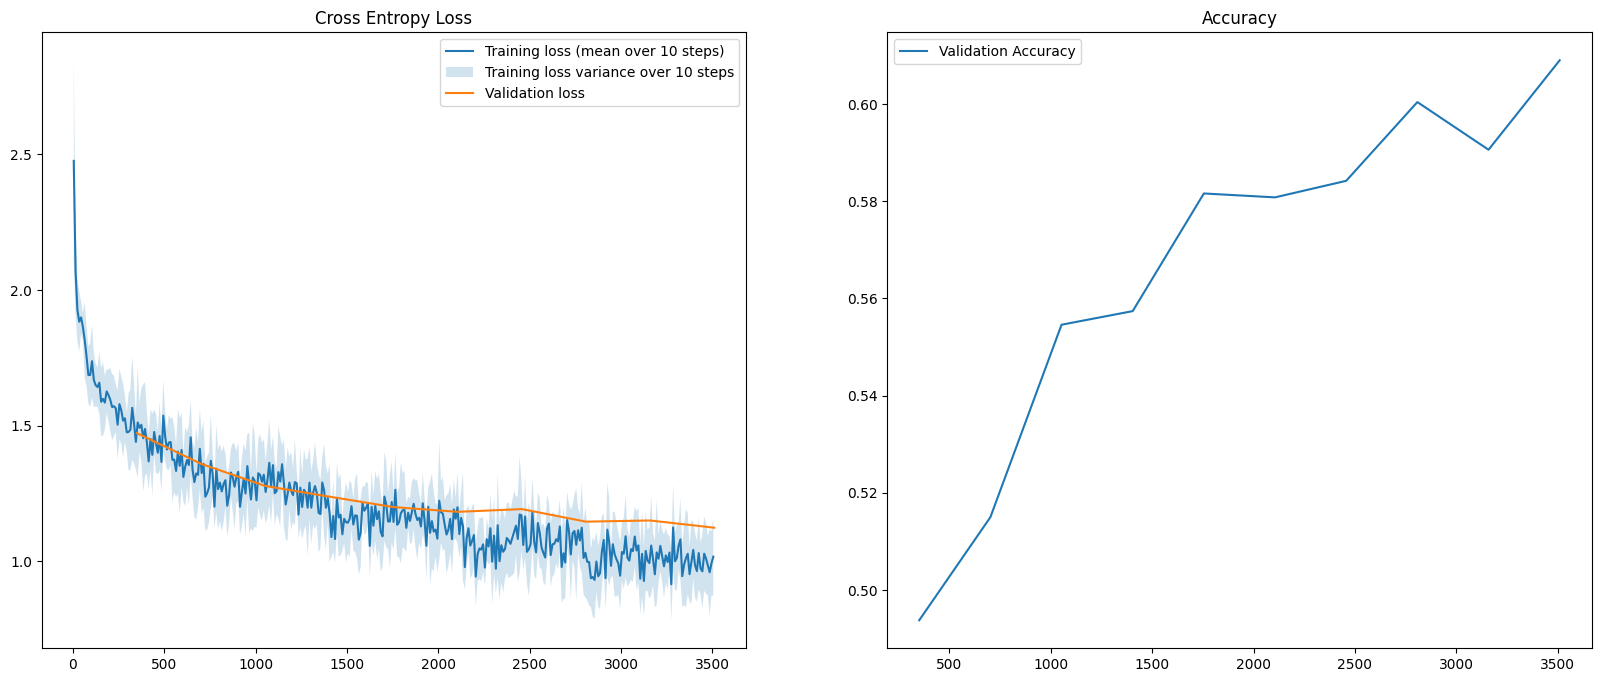

In [5]:
create_plots(trainer, "task2")